In [64]:
%pylab inline
from make2DHistogram import *

Populating the interactive namespace from numpy and matplotlib


In [8]:
X_POS = 0
Y_POS = 1
Z_POS = 2
X_VEL = 3
Y_VEL = 4
Z_VEL = 5
M_TOT = 7

In [142]:
data_A = loadtxt("../data/MD_3840_Planck1/properties_memberA_01")
data_B = loadtxt("../data/MD_3840_Planck1/properties_memberB_01")

In [165]:
n_points = len(data_A[:,0])
delta_r  = zeros((n_points,3))
delta_v  = zeros((n_points,3))
pair_mass = zeros(n_points)

# This defines positions and velocities of B measured by A
delta_r[:,0] = data_B[:,X_POS] - data_A[:,X_POS]
delta_r[:,1] = data_B[:,Y_POS] - data_A[:,Y_POS]
delta_r[:,2] = data_B[:,Z_POS] - data_A[:,Z_POS]
delta_v[:,0] = data_B[:,X_VEL] - data_A[:,X_VEL]
delta_v[:,1] = data_B[:,Y_VEL] - data_A[:,Y_VEL]
delta_v[:,2] = data_B[:,Z_VEL] - data_A[:,Z_VEL]

norm_delta_r = sqrt(delta_r[:,0]**2 + delta_r[:,1]**2 + delta_r[:,2]**2)

pair_mass = data_B[:,M_TOT] + data_A[:,M_TOT]

#Add Hubble Flow
delta_v = delta_v + (delta_r * 100)

# cut in separation
index = where(norm_delta_r<1.0)
index = index[0]

delta_r  = delta_r[index,:]
delta_v = delta_v[index,:]
pair_mass = pair_mass[index]

In [166]:
norm_delta_v = sqrt(delta_v[:,0]**2 + delta_v[:,1]**2 + delta_v[:,2]**2)
norm_delta_r = sqrt(delta_r[:,0]**2 + delta_r[:,1]**2 + delta_r[:,2]**2)

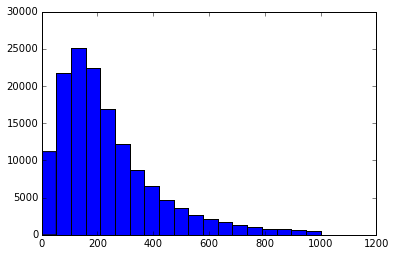

In [167]:
a = hist(norm_delta_v, bins=linspace(0,1000,20))

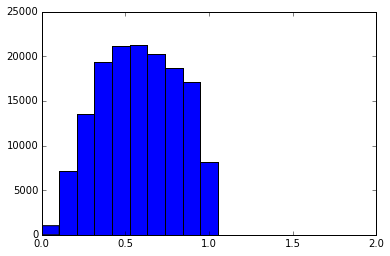

In [168]:
a = hist(norm_delta_r, bins=linspace(0,2.0,20))

In [169]:
radial_vel = delta_v[:,0] * delta_r[:,0] + delta_v[:,1] * delta_r[:,1] +delta_v[:,2] * delta_r[:,2]
radial_vel  = radial_vel/norm_delta_r
tangential_vel = sqrt(norm_delta_v**2 - radial_vel**2)

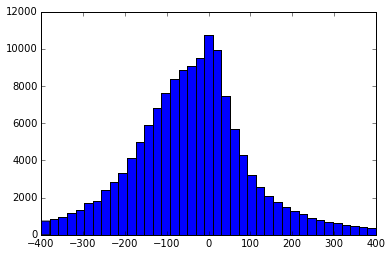

In [170]:
a = hist(radial_vel, bins=linspace(-400,400,40))

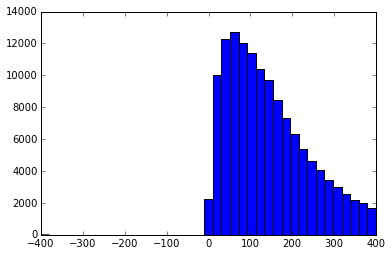

In [171]:
a = hist(tangential_vel, bins=linspace(-400,400,40))

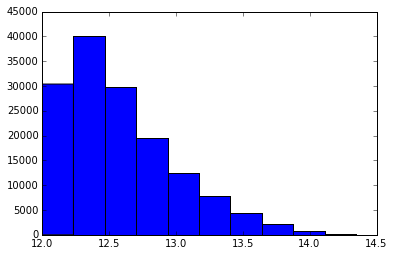

In [172]:
a = hist(log10(pair_mass))

In [173]:
H, xedges,yedges = np.histogram2d(tangential_vel,radial_vel)

(220, 147672)


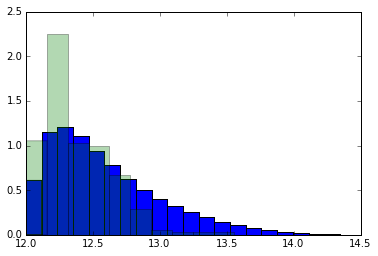

In [174]:
index = where((radial_vel<-90) & (radial_vel>-120) & (tangential_vel <17.0))
index = index[0]
print(size(index), size(radial_vel))
a = hist(log10(pair_mass), normed=1, bins=20)
a = hist(log10(pair_mass[index]),normed=1, alpha=0.3)

In [175]:
# at this point I don't have any cut on the closest neighbor to the pair. This seems to be key to reproduce
# the old results on the v_r-v_tan plane, from the ApJ letter 